# Lösung Test Exam: Management & Nutzung Relationale Daten

### Persönliche Angaben (bitte ergänzen)

<table>
  <tr>
    <td>Vorname:</td>
    <td></td>
  </tr>
  <tr>
    <td>Nachname:</td>
    <td></td>
  </tr>
  <tr>
    <td>Immatrikulationsnummer:</td>
    <td></td>
  </tr>
  <tr>
    <td>Modul:</td>
    <td>Data Science</td>
  </tr>
  <tr>
    <td>Prüfungsdatum / Raum / Zeit:</td>
    <td>07.10.2024 / Raum: SF O3.54 / 8:00 – 11:45</td>
  </tr>
  <tr>
    <td>Hilfsmittel:</td>
    <td>w.MA.XX.DS.24HS (Data Science)<br>Open Book, Eigener Computer, Internet-Zugang</td>
  </tr>
</table>

## Bewertungskriterien

### <b style="color: gray;">(max. erreichbare Punkte: 44)</b>

<table>
  <thead>
    <tr>
      <th>Kategorie</th>
      <th>Beschreibung</th>
      <th>Punkteverteilung</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Code nicht lauffähig oder Ergebnisse nicht sinnvoll</td>
      <td>Der Code enthält Fehler, die verhindern, dass er ausgeführt werden kann (z.B. Syntaxfehler) oder es werden Ergebnisse ausgegeben, welche nicht zur Fragestellung passen.</td>
      <td>0 Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig, aber mit gravierenden Mängeln</td>
      <td>Der Code läuft, aber die Ergebnisse sind aufgrund wesentlicher Fehler unvollständig (z.B. fehlende Joins, gravierende Fehler in SQL-Abfragen). Nur geringer Fortschritt erkennbar.</td>
      <td>25% der max. erreichbaren Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig, aber mit mittleren Mängeln</td>
      <td>Der Code läuft und liefert teilweise korrekte Ergebnisse, aber es gibt grössere Fehler (z.B. fehlende Spalten, unvollständige SQL-Abfragen). Die Ergebnisse sind nachvollziehbar, aber unvollständig oder ungenau.</td>
      <td>50% der max. erreichbaren Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig, aber mit minimalen Mängeln</td>
      <td>Der Code läuft und liefert ein weitgehend korrektes Ergebnis, aber kleinere Fehler (z.B. falsche oder fehlende Sortierung, Rundung von Werten falsch) beeinträchtigen die Vollständigkeit des Ergebnisses.</td>
      <td>75% der max. erreichbaren Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig und korrekt</td>
      <td>Der Code läuft einwandfrei und liefert das korrekte Ergebnis ohne Mängel.</td>
      <td>100% der max. erreichbaren Punkte</td>
    </tr>
  </tbody>
</table>



## Python Libraries und Settings

In [1]:
# Libraries
import os
import sqlite3
import pandas as pd
from sqlalchemy import create_engine, text

# Settings
import warnings
warnings.filterwarnings("ignore")

# Working directory
print(os.getcwd())

/


## <b>Vorbereitung (Hinweis: dieser Teil wird nicht bewertet)</b>

#### <b>1.) Starten Sie eine GitHub Codespaces Instanz auf Basis Ihres Forks des folgenden GitHub Repositories:</b>

##### GitHub-Repository: https://github.com/mario-gellrich-zhaw/python_postgresql_pgadmin


#### <b>2.) Erstellen und Testen Sie die Datenbankverbindung mit der 'postgres' Datenbank.</b>

In [2]:
# Set up für Datenbankverbindung
user = "pgadmin"
password = "geheim"
host = "localhost"
port = "5432"
database = "postgres"

# Erstellen der Connection URL
db_connection_url = "postgresql://" + user + ":" + password +\
                    "@" + host + ":" + port + "/" + database

# Erstellen SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Test der Datenbankverbindung
with engine.connect() as connection:
    result = connection.execute(text('SELECT current_database()'))
    print(result.fetchone())

# Verbindung trennen
engine.dispose()

('postgres',)


##### Spalten-Name und Struktur vom Excel herausfinden, ohne ins Excel zu schauen

In [3]:
import pandas as pd

# Pfad zur Excel-Datei
path = 'workspace/Data/smartphone_dealer_data.xlsx'

# Laden des Excel-Files, um die Tabellenblätter zu lesen
excel_file = pd.ExcelFile(path)

# Ausgabe der Namen aller Tabellenblätter
sheet_names = excel_file.sheet_names
print("Tabellenblätter in der Excel-Datei:", sheet_names)

# Iteriere über die Tabellenblätter und lese die Spaltennamen
for sheet in sheet_names:
    # Lesen der Spaltennamen jedes Tabellenblatts
    columns = pd.read_excel(path, sheet_name=sheet, nrows=0).columns.tolist()
    print(f"Spaltennamen für das Tabellenblatt '{sheet}': {columns}")


Tabellenblätter in der Excel-Datei: ['ER-Diagram', 'Phones', 'Customers', 'Sales', 'SalesPersons', 'Technicians', 'ServiceRecords']
Spaltennamen für das Tabellenblatt 'ER-Diagram': []
Spaltennamen für das Tabellenblatt 'Phones': ['PhoneID', 'Brand', 'Model', 'Year', 'IMEI', 'Price', 'Status']
Spaltennamen für das Tabellenblatt 'Customers': ['CustomerID', 'FirstName', 'LastName', 'Phone', 'Email', 'Address']
Spaltennamen für das Tabellenblatt 'Sales': ['SaleID', 'PhoneID', 'CustomerID', 'SaleDate', 'SalePrice', 'SalespersonID']
Spaltennamen für das Tabellenblatt 'SalesPersons': ['SalespersonID', 'FirstName', 'LastName', 'Phone', 'Email', 'HireDate', 'CommissionRate']
Spaltennamen für das Tabellenblatt 'Technicians': ['TechnicianID', 'FirstName', 'LastName', 'Phone', 'Email', 'HireDate', 'Specialization']
Spaltennamen für das Tabellenblatt 'ServiceRecords': ['ServiceID', 'PhoneID', 'ServiceDate', 'ServiceDescription', 'Cost', 'TechnicianID']


#### <b>3.) Lesen Sie die Tabellenblätter aus 'smartphone_dealer_data.xlsx' ein, und speichern Sie diese in separaten DataFrames.</b>

In [4]:
# Pfad zur .xlsx Datei
path = 'workspace/Data/smartphone_dealer_data.xlsx'

# Einlesen der Daten aus Excel File
df_phones = pd.read_excel(path, sheet_name='Phones')
df_customers = pd.read_excel(path, sheet_name='Customers')
df_sales = pd.read_excel(path, sheet_name='Sales')
df_salespersons = pd.read_excel(path, sheet_name='SalesPersons')
df_technicians = pd.read_excel(path, sheet_name='Technicians')
df_servicerecords = pd.read_excel(path, sheet_name='ServiceRecords')

# Anpassen der Spaltennamen zu 'lowercase'
df_phones.columns = df_phones.columns.str.lower()
df_customers.columns = df_customers.columns.str.lower()
df_sales.columns = df_sales.columns.str.lower()
df_salespersons.columns = df_salespersons.columns.str.lower()
df_technicians.columns = df_technicians.columns.str.lower()
df_servicerecords.columns = df_servicerecords.columns.str.lower()


#### <b>4.) Schreiben Sie die erstellten DataFrames in separate Tabellen in Ihrer Datenbank.</b>

In [5]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Schreiben der DataFrames in die Datenbank
df_phones.to_sql('phones', engine, if_exists='replace', index=False)
df_customers.to_sql('customers', engine, if_exists='replace', index=False)
df_sales.to_sql('sales', engine, if_exists='replace', index=False)
df_salespersons.to_sql('salespersons', engine, if_exists='replace', index=False)
df_technicians.to_sql('technicians', engine, if_exists='replace', index=False)
df_servicerecords.to_sql('servicerecords', engine, if_exists='replace', index=False)

# Datenbankverbindung trennen
engine.dispose()

<div style="background-color: #F0EAD6;">

#### <b> Hinweis! 

#### Falls etwas mit Ihrer PostgreSQL Verbindung nicht funktionieren sollte, verwenden Sie für die folgenden Aufgaben die SQLite Datenbank 'smartphone_dealer_data.db'. Sie finden diese auf Moodle in der Woche 4 im Order 'AP01'. Schieben (per drag and drop) Sie dazu die SQLite-Datenbank von Ihrem lokalen PC in Ihre GitHub Codespaces Environment.</b>

#### <b> Das folgende Python-Codebeispiel demonstriert den Verbindungsaufbau mit der SQLite Datenbank mit Hilfe von Python.</b>

```python
# Engine für Datenbankverbindung erstellen
engine = create_engine('sqlite:///workspace/smartphone_dealer_data.db')

# SQL Abfrage
df_sub = pd.read_sql_query("""SELECT *
                              FROM phones;""",
                          con=engine)

# Schliessen der Datenbankverbindung
engine.dispose()

df_sub 
```
</div>

## <b>Aufgaben (Hinweis: Dieser Teil wird bewertet)</b>
<b style="color:blue;">Hinweise zu den folgenden Aufgaben:</b>
<ul style="color:blue;">
  <li>Erstellen Sie je Aufgabe eine SQL Abfrage und integrieren Sie diese in Ihren Python Code.</li>
  <li>Speichern Sie je Aufgabe die Ergebnistabelle in einem DataFrame und stellen Sie diesen ganz oder in Teilen (z.B. erste 5 Zeilen) dar.</li>
</ul>

#### <b>Aufgabe (1): Listen Sie alle Kunden auf, welche mit Vornamen John oder Sophia heissen.</b>
<b>Details zur Aufgabenstellung:</b>
- Sie finden die benötigte Informationen in der Tabelle 'Customers'.

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>


The WHERE clause is used to filter records.
It is used to extract only those records that fulfill a specified condition.
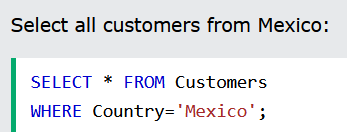 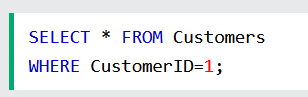 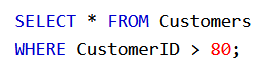 <br>

The following operators can be used in the WHERE clause:
Operator 	Description 	
1. = 	Equal 	
2. > 	Greater than 	
3. < 	Less than 	
4. >=	Greater than or equal 	
5. <= 	Less than or equal 	
6. <> 	Not equal. Note: In some versions of SQL this operator may be written as != 	
7. BETWEEN 	Between a certain range 
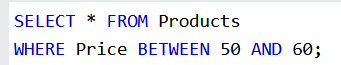	
8. LIKE 	Search for a pattern 	
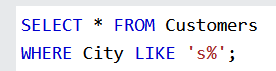
9. IN 	To specify multiple possible values for a column
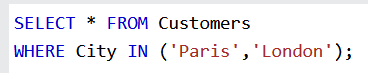

In [35]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT *
                              FROM Customers
                              WHERE FirstName IN ('John', 'Sophia');""",
                          con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,customerid,firstname,lastname,phone,email,address
0,CUJPY7K04ABQ,Jessica,Davis,+41 (0)5804114211,customer1@example.com,"66720 Elm St, City, Country"
1,CUZ6NEGT1KC6,John,Brown,+41 (0)1748330217,customer4@example.com,"64083 Oak St, City, Country"
2,CUITIA6FINIX,John,Brown,+41 (0)1847224247,customer7@example.com,"71885 Elm St, City, Country"
3,CUGENTOEF8C8,David,Brown,+41 (0)1254236890,customer10@example.com,"61965 Birch St, City, Country"
4,CUM8C4QVLNN3,Sarah,Davis,+41 (0)3893907759,customer11@example.com,"50201 Pine St, City, Country"
...,...,...,...,...,...,...
977,CU6KMLTPUA5U,Jessica,Brown,+41 (0)0954809651,customer4992@example.com,"86042 Oak St, City, Country"
978,CUA95XOFT1GR,Sophia,Brown,+41 (0)5995800816,customer4993@example.com,"24840 Ash St, City, Country"
979,CUFZ9QBNNP2S,John,Davis,+41 (0)5904909460,customer4994@example.com,"94310 Main St, City, Country"
980,CU4RAN3HL651,Ashley,Brown,+41 (0)0934123846,customer4998@example.com,"05702 Oak St, City, Country"


#### <b>Aufgabe (2): Selektieren Sie die Telefone von "Samsung", und geben Sie deren Preise als Ganzzahlen (INTEGER) zurück.</b>
<b>Details zur Aufgabenstellung:</b>
- Sie finden die benötigten Informationen in der Tabelle 'Phones'.
- Die Ergebnistabelle muss die Spalten: 'PhoneID',  'Brand' und den Price als Ganzzahl (INTEGER) enthalten.
- Ordnen Sie die Tabelle absteigend nach Price als Ganzzahl (INTEGER).
- Limitieren Sie die Anzahl der mit der SQL Abfrage zurückgegebenen Phones auf 10.

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

- The SELECT DISTINCT statement is used to return only distinct (different) values
- The ORDER BY keyword is used to sort the result-set in ascending or descending order. <br>
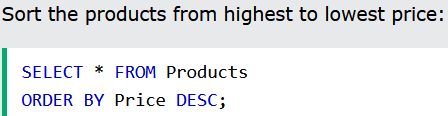 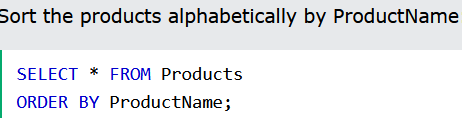 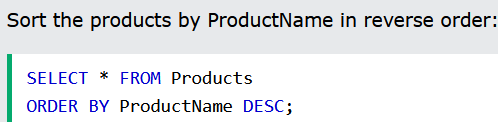 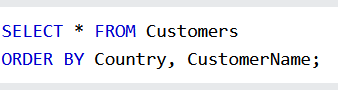
- The AND operator is used to filter records based on more than one condition, like if you want to return all customers from Spain that starts with the letter 'G':<br>
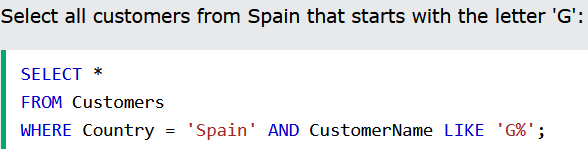

In [7]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT DISTINCT
                                  p.PhoneID,
                                  p.Brand, 
                                  CAST(p.Price AS INTEGER) AS PriceInteger
                              FROM Phones AS p
                              WHERE p.Brand = 'Samsung'
                              ORDER BY PriceInteger DESC
                              LIMIT 10;""",
                          con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub


,phoneid,brand,priceinteger
0,PRSVWQKWG5S,Samsung,1200
1,P3KPFEFH1F7,Samsung,1199
2,P4NZ1YLM2TI,Samsung,1199
3,PR452SG9VL5,Samsung,1199
4,P0ANLRVWKQ4,Samsung,1198
5,PC1M86UT012,Samsung,1198
6,PLN0SZL6U9G,Samsung,1197
7,PVROBGZ8PAH,Samsung,1196
8,PB0HVE5I7VS,Samsung,1195
9,P70LJGX90PK,Samsung,1193


#### <b>Aufgabe (3): Welches sind alle Telefonmodelle, die zwischen 2021 und 2023 auf den Markt kamen, einen IMEI-Wert haben und mehr als 800 USD kosten?</b>
<b>Details zur Aufgabenstellung:</b>
- Sie finden die benötigten Informationen in der Tabelle 'Phones'.
- Ordnen Sie die Ergebnisse absteigend nach Price.

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

In [38]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT p.Model, 
                           p.Price
                                FROM Phones AS p
                                WHERE p.Year BETWEEN 2021 AND 2023
                                AND p.IMEI IS NOT NULL
                                AND p.Price > 800
                                ORDER BY p.Price DESC;""",
                          con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub


,model,price
0,iPhone 13,1199.93
1,8.3 5G,1199.91
2,Mi 11,1199.25
3,iPhone 13,1199.25
4,Xperia 5,1199.22
...,...,...
3426,8.3 5G,800.72
3427,Reno 6,800.54
3428,Xperia 5,800.44
3429,Pixel 6,800.31


#### <b>Aufgabe (4): Ermitteln Sie alle Verkäufe, die von der Verkäuferin "Diana Morris" durchgeführt wurden.</b>
<b>Details zur Aufgabenstellung:</b>
- Geben Sie Verkaufspreis, Datum und die Namen der Kunden aus.
- Sie finden die benötigten Informationen in den Tabellen 'Sales', 'SalesPersons' und 'Customers'.

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

In [9]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT 
                                    s.SaleID, 
                                    s.SalePrice, 
                                    s.SaleDate, 
                                    c.FirstName, 
                                    c.LastName 
                                FROM Sales AS s
                                INNER JOIN SalesPersons AS sp ON s.SalespersonID = sp.SalespersonID
                                INNER JOIN Customers AS c ON s.CustomerID = c.CustomerID
                                WHERE sp.FirstName = 'Diana' AND sp.LastName = 'Morris';""",
                            con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,saleid,saleprice,saledate,firstname,lastname
0,SNZEOOIOGP3,550.98,2021-01-31,Jessica,Davis
1,SXWGWJNQA1N,505.83,2023-09-30,Sarah,Williams
2,SIN0O9JOOX8,966.40,2022-05-31,Sophia,Rodriguez
3,SRFQB6ZKO6L,809.61,2022-08-31,Chris,Davis
4,SWUUBMCPQ22,924.66,2021-09-30,Michael,Rodriguez
...,...,...,...,...,...
342,SIRWTKX5OF0,871.37,2021-12-31,Robert,Williams
343,S6RCGLJWZP7,683.36,2021-11-30,David,Miller
344,S7G31ZIVNCF,482.95,2022-01-31,Chris,Davis
345,SKS2R5N7XWH,626.23,2023-06-30,David,Davis


#### <b>Aufgabe (5): Ermitteln Sie die Namen der Kunden und die Modelle der Telefone, welche diese gekauft haben, aber nur die Verkäufe über 600 USD.</b>
<b>Details zur Aufgabenstellung:</b>
- Sie finden die benötigten Informationen in den Tabellen 'Sales', 'Customers' und 'Phones'.
- Ordnen Sie die Tabelle absteigend nach SaleDate.

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

**Aggregate functions** are often used with the GROUP BY clause of the SELECT statement. The GROUP BY clause splits the result-set into groups of values and the aggregate function can be used to return a single value for each group. The most commonly used SQL aggregate functions are *(Aggregate functions ignore null values (except for COUNT())*):

1. MIN() - returns the smallest value within the selected column 
2. MAX() - returns the largest value within the selected column <br> 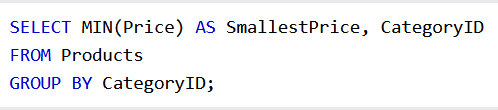
3. COUNT() - returns the number of rows in a set/ returns the number of rows that matches a specified criterion <br> 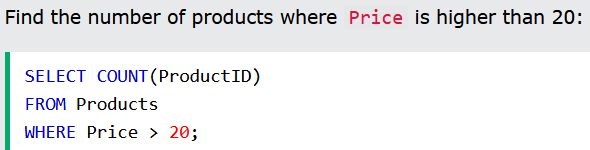
4. SUM() - returns the total sum of a numerical column <br>  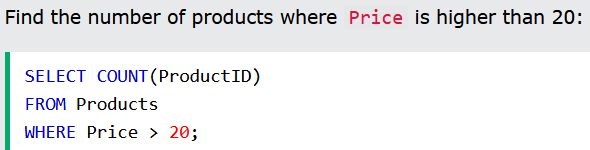
5. AVG() - returns the average value of a numerical column <br> 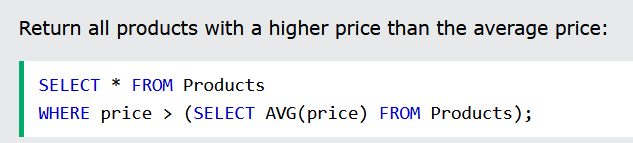

In [10]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT 
                                c.FirstName, 
                                c.LastName, 
                                p.Model, 
                                s.SaleDate
                            FROM Sales AS s
                            INNER JOIN Customers AS c ON s.CustomerID = c.CustomerID
                            INNER JOIN Phones AS p ON s.PhoneID = p.PhoneID
                            WHERE s.SalePrice > 600
                            ORDER BY s.SaleDate DESC;""",
                          con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,firstname,lastname,model,saledate
0,Chris,Brown,P40,2023-12-31
1,Emily,Martinez,OnePlus 9,2023-12-31
2,Michael,Davis,OnePlus 9,2023-12-31
3,Emily,Martinez,V60 ThinQ,2023-12-31
4,Emily,Davis,OnePlus 9,2023-12-31
...,...,...,...,...
1241,Sophia,Williams,8.3 5G,2021-01-31
1242,David,Brown,iPhone 13,2021-01-31
1243,Jessica,Garcia,Pixel 6,2021-01-31
1244,Michael,Miller,iPhone 13,2021-01-31


#### <b>Aufgabe (6): Ermitteln Sie den durchschnittlichen Verkaufspreis und die Anzahl der Verkäufe für jeden Verkäufer, aber nur für Verkäufer, die mehr als 10 Verkäufe getätigt haben.</b>
<b>Details zur Aufgabenstellung:</b>
- Sie finden die benötigten Informationen in den Tabellen 'SalesPersons' und 'Sales'.
- Ordnen Sie die Tabelle absteigend nach der Anzahl der Verkäufe.

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

In [11]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT 
                                sp.FirstName, 
                                sp.LastName, 
                                AVG(s.SalePrice) AS AvgSalePrice, 
                                COUNT(s.SaleID) AS TotalSales
                            FROM SalesPersons AS sp
                            INNER JOIN Sales AS s ON sp.SalespersonID = s.SalespersonID
                            GROUP BY 
                                sp.SalespersonID, 
                                sp.FirstName, 
                                sp.LastName
                            HAVING COUNT(s.SaleID) > 10
                            ORDER BY TotalSales DESC;""",
                          con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,firstname,lastname,avgsaleprice,totalsales
0,Charlie,Patel,697.212539,382
1,Alice,Nguyen,692.154354,379
2,Edward,Evans,706.055054,368
3,Bob,Kim,697.247465,359
4,Diana,Morris,700.886772,347


**Aggregate functions** are often used with the GROUP BY clause of the SELECT statement. The GROUP BY clause splits the result-set into groups of values and the aggregate function can be used to return a single value for each group. The most commonly used SQL aggregate functions are *(Aggregate functions ignore null values (except for COUNT())*):

1. MIN() - returns the smallest value within the selected column ![grafik.png](attachment:grafik.png)
2. MAX() - returns the largest value within the selected column ![grafik-2.png](attachment:grafik-2.png)
3. COUNT() - returns the number of rows in a set/ returns the number of rows that matches a specified criterion ![grafik-3.png](attachment:grafik-3.png) ![grafik-3.png](attachment:grafik-3.png)
4. SUM() - returns the total sum of a numerical column ![grafik-4.png](attachment:grafik-4.png)
5. AVG() - returns the average value of a numerical column ![grafik-5.png](attachment:grafik-5.png)

#### <b>Aufgabe (7): Ermitteln Sie die Anzahl der Reparaturen, die von jedem Techniker durchgeführt wurden.</b>
<b>Details zur Aufgabenstellung:</b>
- Sie finden die benötigten Informationen in den Tabellen 'Technicians' und 'ServiceRecords'.
- Geben Sie den Vornamen und Nachnamen des Technikers sowie die Anzahl der Reparaturen an.
- Ordnen Sie die Ergebnistabelle absteigend nach Anzahl der Reparaturen.

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

In [12]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT 
                                t.FirstName, 
                                t.LastName, 
                                COUNT(sr.ServiceID) AS AnzahlReparaturen
                            FROM Technicians AS t
                            INNER JOIN ServiceRecords AS sr ON t.TechnicianID = sr.TechnicianID
                            GROUP BY t.FirstName, t.LastName
                            ORDER BY AnzahlReparaturen DESC;""", 
                          con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,firstname,lastname,anzahlreparaturen
0,Olivia,Santos,123
1,Kyle,Santos,118
2,Ivan,Lee,65
3,Sophia,Watson,57
4,Mia,Santos,46
5,Ivan,Watson,46
6,Sophia,Turner,46
7,Liam,Roberts,46
8,Sophia,Clark,46
9,Greg,Roberts,46


#### <b>Aufgabe (8): Ermitteln Sie die Anzahl der Verkäufe pro Verkäufer und den durchschnittlichen Verkaufspreis pro Verkäufer.</b>
<b>Details zur Aufgabenstellung: </b>
- Sie finden die benötigten Informationen in den Tabellen 'SalesPersons' und 'Sales'.
- Verwenden Sie nur Verkäufe, deren Verkaufspreis über 500 USD liegt.
- Runden Sie den durchschnittlichen Verkaufspreis auf zwei Nachkommastellen.
- Sortieren Sie die Ergebnisse nach der Anzahl der Verkäufe und zeigen Sie nur die Top 5 Verkäufer an.

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

In [13]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT 
                                sp.FirstName, 
                                sp.LastName, 
                                COUNT(s.SaleID) AS AnzahlVerkaeufe,
                                ROUND(AVG(CAST(s.SalePrice AS NUMERIC)),2) AS DurchschnittlicherVerkaufspreis
                            FROM SalesPersons AS sp
                            INNER JOIN Sales AS s ON sp.SalespersonID = s.SalespersonID
                            WHERE s.SalePrice > 500
                            GROUP BY
                                sp.FirstName, 
                                sp.LastName
                            ORDER BY AnzahlVerkaeufe DESC
                            LIMIT 5;""",
                           con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,firstname,lastname,anzahlverkaeufe,durchschnittlicherverkaufspreis
0,Charlie,Patel,320,745.52
1,Edward,Evans,314,750.71
2,Alice,Nguyen,311,744.91
3,Bob,Kim,299,746.88
4,Diana,Morris,291,749.49


### Aufgabe (9): Ermitteln Sie die Anzahl der Verkäufe und den Gesamtumsatz für jeden Verkäufer, und sortieren Sie die Ergebnisse nach dem Umsatz in absteigender Reihenfolge.

Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in den Tabellen 'SalesPersons' und 'Sales'.
    Der Gesamtumsatz wird durch die Summe der Verkaufspreise berechnet.

In [14]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# SQL-Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT 
                                sp.FirstName, 
                                sp.LastName, 
                                COUNT(s.SaleID) AS AnzahlVerkaeufe, 
                                SUM(s.SalePrice) AS GesamtUmsatz
                            FROM SalesPersons AS sp
                            INNER JOIN Sales AS s ON sp.SalespersonID = s.SalespersonID
                            GROUP BY sp.FirstName, sp.LastName
                            ORDER BY GesamtUmsatz DESC;""",
                           con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub


,firstname,lastname,anzahlverkaeufe,gesamtumsatz
0,Charlie,Patel,382,266335.19
1,Alice,Nguyen,379,262326.50
2,Edward,Evans,368,259828.26
3,Bob,Kim,359,250311.84
4,Diana,Morris,347,243207.71


#### Liste aller Tabellen in DB

In [15]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# SQL-Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT table_name 
                           FROM information_schema.tables 
                           WHERE table_schema = 'public';""",
                           con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,table_name
0,Orders
1,OrderDetails
2,apartments_data_prepared
3,Products
4,Employees
5,Suppliers
6,Customers
7,Shippers
8,Categories
9,ER-Diagram


## Spaltennamen einer Tabelle herausfinden

In [16]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# SQL-Abfrage erstellen und Ergebnis in einem DataFrame speichern
df_sub = pd.read_sql_query("""SELECT column_name
                           FROM information_schema.columns
                           WHERE table_name = 'servicerecords';
                           """,
                           con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,column_name
0,cost
1,serviceid
2,phoneid
3,servicedate
4,servicedescription
5,technicianid


### Aufgabe (20): Zeigen Sie alle Kunden an, die ein Telefon mit einem Preis von mehr als 700 USD gekauft haben
Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in den Tabellen 'Customers', 'Sales', und 'Phones'.
    Filtern Sie nach dem Preis des Telefons.

In [17]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# SQL-Abfrage erstellen
df_sub = pd.read_sql_query("""SELECT c.FirstName, c.LastName, p.Model, p.Price
                            FROM Sales AS s
                            INNER JOIN Customers AS c ON s.CustomerID = c.CustomerID
                            INNER JOIN Phones AS p ON s.PhoneID = p.PhoneID
                            WHERE p.Price > 700;""", con=engine)
# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,firstname,lastname,model,price
0,Chris,Garcia,iPhone 13,806.54
1,Sophia,Williams,Mi 11,1063.30
2,Robert,Williams,Galaxy S21,1158.32
3,Sarah,Jones,P40,833.13
4,Sophia,Garcia,Reno 6,1061.50
...,...,...,...,...
1301,Sophia,Smith,OnePlus 9,912.78
1302,Sarah,Miller,Reno 6,1177.99
1303,Jessica,Brown,Mi 11,912.11
1304,Sarah,Martinez,Galaxy S21,959.85


### Aufgabe (21): Welche Telefone wurden im Jahr 2023 verkauft und wie viele Verkäufe gab es insgesamt für jedes Modell?

Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in den Tabellen 'Sales' und 'Phones'.
    Filtern Sie die Verkäufe nach dem Jahr 2023 und gruppieren Sie nach Modell.

In [18]:
# SQL-Abfrage erstellen
df_sub = pd.read_sql_query("""SELECT p.Model, COUNT(s.SaleID) AS AnzahlVerkaeufe
                            FROM Sales AS s
                            INNER JOIN Phones AS p ON s.PhoneID = p.PhoneID
                            WHERE EXTRACT(YEAR FROM CAST(s.SaleDate AS DATE)) = 2023
                            GROUP BY p.Model
                            ORDER BY AnzahlVerkaeufe DESC;""", con=engine)


#### Aufgabe (22): Finden Sie die Techniker, die mehr als 10 Reparaturen durchgeführt haben.

Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in den Tabellen 'Technicians' und 'ServiceRecords'.
    Gruppieren Sie nach Techniker und zählen Sie die Reparaturen.

In [19]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# SQL-Abfrage erstellen
df_sub = pd.read_sql_query("""SELECT t.FirstName, 
                           t.LastName, 
                           COUNT(sr.ServiceID) AS AnzahlReparaturen
                            FROM Technicians AS t
                            INNER JOIN ServiceRecords AS sr ON t.TechnicianID = sr.TechnicianID
                            GROUP BY t.FirstName, t.LastName
                            HAVING COUNT(sr.ServiceID) > 10;""", con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub

,firstname,lastname,anzahlreparaturen
0,Sophia,Watson,57
1,Mia,Lee,44
2,Ivan,Watson,46
3,Sophia,Turner,46
4,Liam,Roberts,46
5,Liam,Santos,45
6,Mia,Santos,46
7,Ivan,Lee,65
8,Olivia,Santos,123
9,Kyle,Santos,118


#### Aufgabe : Zeigen Sie die Kunden, die mehr als ein Telefon gekauft haben.

Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in den Tabellen 'Sales' und 'Customers'.
    Gruppieren Sie nach Kunde und filtern Sie nach Anzahl der Käufe.

In [20]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# SQL-Abfrage erstellen
df_sub = pd.read_sql_query("""SELECT 
                           c.FirstName, 
                           c.LastName, 
                           COUNT(s.SaleID) AS AnzahlKaeufe
                            FROM Sales AS s
                            INNER JOIN Customers AS c ON s.CustomerID = c.CustomerID
                            GROUP BY c.FirstName, c.LastName
                            HAVING COUNT(s.SaleID) > 1;""", con=engine)

# Datenbankverbindung trennen
engine.dispose()

# Ergebnis anzeigen
df_sub


,firstname,lastname,anzahlkaeufe
0,Ashley,Miller,14
1,Robert,Garcia,28
2,John,Davis,20
3,Robert,Brown,21
4,Sarah,Jones,24
...,...,...,...
95,Robert,Miller,25
96,Chris,Johnson,24
97,Michael,Jones,8
98,Michael,Smith,15


### Aufgabe (10): Finden Sie alle Kunden, deren Nachname mit dem Buchstaben "M" beginnt.
Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in der Tabelle 'Customers'.
    Verwenden Sie den Operator LIKE, um nach Kunden zu filtern, deren Nachname mit "M" beginnt.

In [21]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT * 
                              FROM Customers
                              WHERE LastName LIKE 'M%';""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,customerid,firstname,lastname,phone,email,address
0,CU56BUO578HM,Sarah,Martinez,+41 (0)8845095127,customer3@example.com,"59210 Elm St, City, Country"
1,CUQ400UMTHCJ,Emily,Martinez,+41 (0)9531986407,customer6@example.com,"68124 Spruce St, City, Country"
2,CUQT5KNL1177,David,Martinez,+41 (0)5529090793,customer14@example.com,"59493 Oak St, City, Country"
3,CUH0VSU463KJ,Ashley,Miller,+41 (0)5861128863,customer16@example.com,"97776 Cedar St, City, Country"
4,CUL16WUJQOOH,Michael,Miller,+41 (0)5695570065,customer18@example.com,"71460 Spruce St, City, Country"
...,...,...,...,...,...,...
1036,CU3LCO3I4ZNA,Robert,Miller,+41 (0)1500976329,customer4987@example.com,"18781 Ash St, City, Country"
1037,CUYE2Y6GL3SA,Ashley,Miller,+41 (0)7207574738,customer4988@example.com,"80662 Birch St, City, Country"
1038,CU5OMHMTQ1BV,Sarah,Martinez,+41 (0)3652349305,customer4989@example.com,"56188 Birch St, City, Country"
1039,CURXKMEUEPQB,Chris,Miller,+41 (0)2926768360,customer4996@example.com,"14017 Main St, City, Country"


#### Aufgabe (11): Zählen Sie die Anzahl der Telefone, die im Jahr 2022 auf den Markt gekommen sind.

Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in der Tabelle 'Phones'.
    Verwenden Sie die WHERE-Klausel, um das Jahr 2022 zu filtern, und zählen Sie die Ergebnisse.

In [22]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT COUNT(*)
                           FROM Phones
                           WHERE Year = 2022;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,count
0,1971


#### Aufgabe (12): Zeigen Sie alle Verkäufe an, die einen Verkaufspreis zwischen 500 und 1000 USD hatten.

Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in der Tabelle 'Sales'.
    Verwenden Sie BETWEEN in der WHERE-Klausel, um den Preisbereich zu filtern

In [23]:
####Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame (SELECT s.saledate, s.saleprice)
df_sub = pd.read_sql_query("""SELECT *
                           FROM Sales AS s
                           WHERE SalePrice BETWEEN 500 AND 1000;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,saleid,phoneid,customerid,saledate,saleprice,salespersonid
0,SCKO2XKCE4G,P92P4T91MOP,CU2L9P5RVGSG,2021-01-31,781.81,SP978ESV4CFY
1,SYO68ON4HNM,POK3ZHBW389,CUG79HUA45AA,2021-01-31,706.08,SP5JFLTFWWJ5
2,SFGZXMTNNR8,PBAA3RWV6M8,CUQGHNM18ON0,2021-01-31,517.90,SPBHD046WXE7
3,S8SXM0VU3CT,PSQB5MRAZEH,CU0MP3TPVKMW,2021-01-31,714.54,SPCJOJTDOVY8
4,SKOD3O9ONF9,PWFILNRJKYT,CUANXKP0XPYV,2021-01-31,966.47,SP4PNJ6JHR1J
...,...,...,...,...,...,...
1530,SNVLM89QNXC,PXOIQVMYBAH,CUMWXV3JH5B2,2023-12-31,680.87,SP4PNJ6JHR1J
1531,SWF659TW6RH,PIPG3UJJCI2,CUQS7V90YY3K,2023-12-31,926.52,SP978ESV4CFY
1532,SZPK0HN2830,P1AKYDKAH47,CUMWUGG7B0UH,2023-12-31,642.47,SPBHD046WXE7
1533,S7LWU9HM8EX,PTXPPHL4KEI,CUAAHYYKQRGQ,2023-12-31,962.27,SPCJOJTDOVY8


####Aufgabe (13): Ermitteln Sie den durchschnittlichen Preis aller verkauften Telefone pro Verkaufsjahr.

Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in den Tabellen 'Sales' und 'Phones'.
    Verwenden Sie INNER JOIN, um die beiden Tabellen basierend auf PhoneID zu verbinden, und berechnen Sie den durchschnittlichen Preis pro Jahr.

In [24]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT 
                           EXTRACT(YEAR FROM CAST(s.SaleDate AS DATE)) AS SaleYear, 
                           AVG(p.Price) AS AvgPrice
                           FROM Sales AS s
                           INNER JOIN Phones AS p ON s.PhoneID = p.PhoneID
                           GROUP BY SaleYear
                           ORDER BY SaleYear;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,saleyear,avgprice
0,2021.0,847.924300
1,2022.0,862.125492
2,2023.0,852.529840


#### Aufgabe (14): Ermitteln Sie die Anzahl der Reparaturen, die im Jahr 2023 durchgeführt wurden.

Details zur Aufgabenstellung:

    Sie finden die benötigten Informationen in der Tabelle 'ServiceRecords'.
    Verwenden Sie EXTRACT und WHERE, um das Jahr 2023 zu filtern.

In [25]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT COUNT(*)
                           FROM ServiceRecords
                           WHERE EXTRACT(YEAR FROM CAST(ServiceDate AS DATE)) = 2023;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,count
0,281


#### Aufgabe (15): Finden Sie alle Verkäufer, die mehr als 5 Verkäufe im Jahr 2022 getätigt haben.

Details zur Aufgabenstellung:

    Die relevanten Informationen befinden sich in den Tabellen 'Sales' und 'SalesPersons'.
    Filtern Sie nach dem Jahr 2022 und verwenden Sie die GROUP BY und HAVING-Klausel, um die Verkäufer zu finden, die mehr als 5 Verkäufe getätigt haben.

In [26]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT sp.FirstName, sp.LastName, COUNT(s.SaleID) AS AnzahlVerkaeufe
                           FROM Sales AS s
                           INNER JOIN SalesPersons AS sp ON s.SalespersonID = sp.SalespersonID
                           WHERE EXTRACT(YEAR FROM CAST(s.SaleDate AS DATE)) = 2022
                           GROUP BY sp.FirstName, sp.LastName
                           HAVING COUNT(s.SaleID) > 5;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,firstname,lastname,anzahlverkaeufe
0,Alice,Nguyen,118
1,Bob,Kim,118
2,Charlie,Patel,118
3,Diana,Morris,118
4,Edward,Evans,118


#### Aufgabe (16): Ermitteln Sie die Kunden, die sowohl ein Samsung- als auch ein iPhone-Telefon gekauft haben.

Details zur Aufgabenstellung:

    Die relevanten Informationen befinden sich in den Tabellen 'Sales', 'Phones', und 'Customers'.
    Verwenden Sie JOIN-Operationen und GROUP BY-Klauseln, um Kunden zu identifizieren, die Telefone beider Marken gekauft haben.

In [27]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT c.FirstName, c.LastName
                           FROM Sales AS s
                           INNER JOIN Phones AS p ON s.PhoneID = p.PhoneID
                           INNER JOIN Customers AS c ON s.CustomerID = c.CustomerID
                           WHERE p.Brand IN ('Samsung', 'iPhone')
                           GROUP BY c.FirstName, c.LastName
                           HAVING COUNT(DISTINCT p.Brand) = 2;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,firstname,lastname


#### Aufgabe (17): Finden Sie das teuerste Telefon, das 2023 verkauft wurde.

Details zur Aufgabenstellung:

    Die relevanten Informationen befinden sich in den Tabellen 'Sales' und 'Phones'.
    Verwenden Sie INNER JOIN, ORDER BY und LIMIT, um das teuerste Telefon für das Jahr 2023 zu ermitteln.

In [ ]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT p.Model, p.Price, s.SaleDate
                           FROM Sales AS s
                           INNER JOIN Phones AS p ON s.PhoneID = p.PhoneID
                           WHERE EXTRACT(YEAR FROM CAST(s.SaleDate AS DATE)) = 2023
                           ORDER BY p.Price DESC
                           LIMIT 1;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,model,price,saledate
0,iPhone 13,1199.21,2023-06-30


#### Aufgabe (17): Finden Sie das teuerste Telefon, das 2023 verkauft wurde.

Details zur Aufgabenstellung:

    Die relevanten Informationen befinden sich in den Tabellen 'Sales' und 'Phones'.
    Verwenden Sie INNER JOIN, ORDER BY und LIMIT, um das teuerste Telefon für das Jahr 2023 zu ermitteln.

In [29]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT p.Model, p.Price, s.SaleDate
                           FROM Sales AS s
                           INNER JOIN Phones AS p ON s.PhoneID = p.PhoneID
                           WHERE EXTRACT(YEAR FROM CAST(s.SaleDate AS DATE)) = 2023
                           ORDER BY p.Price DESC
                           LIMIT 1;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,model,price,saledate
0,iPhone 13,1199.21,2023-06-30


#### Aufgabe (18): Finden Sie alle Techniker, die keine Reparaturen durchgeführt haben.

Details zur Aufgabenstellung:

    Die relevanten Informationen befinden sich in den Tabellen 'Technicians' und 'ServiceRecords'.
    Verwenden Sie LEFT JOIN und WHERE, um Techniker zu finden, die keine Reparaturen durchgeführt haben.

In [30]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT t.FirstName, t.LastName
                           FROM Technicians AS t
                           LEFT JOIN ServiceRecords AS sr ON t.TechnicianID = sr.TechnicianID
                           WHERE sr.ServiceID IS NULL;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,firstname,lastname


#### Aufgabe (19): Ermitteln Sie das Telefonmodell mit den meisten Verkäufen im Jahr 2022.

Details zur Aufgabenstellung:

    Die relevanten Informationen befinden sich in den Tabellen 'Sales' und 'Phones'.
    Verwenden Sie GROUP BY und ORDER BY, um das Telefonmodell mit den meisten Verkäufen im Jahr 2022 zu ermitteln.

In [31]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT p.Model, COUNT(s.SaleID) AS AnzahlVerkaeufe
FROM Sales AS s
INNER JOIN Phones AS p ON s.PhoneID = p.PhoneID
WHERE EXTRACT(YEAR FROM CAST(s.SaleDate AS DATE)) = 2022
GROUP BY p.Model
ORDER BY AnzahlVerkaeufe DESC
LIMIT 1;
""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,model,anzahlverkaeufe
0,P40,72


#### Aufgabe (20): Listen Sie alle Kunden auf, die seit dem Jahr 2020 keine Telefone mehr gekauft haben.

Details zur Aufgabenstellung:

    Die relevanten Informationen befinden sich in den Tabellen 'Sales' und 'Customers'.
    Verwenden Sie LEFT JOIN und WHERE, um Kunden zu finden, die seit 2020 keine Telefone mehr gekauft haben.

In [32]:
# Verbindung zur Datenbank herstellen
connection = engine.raw_connection()

# Ausführen der SQL-Abfrage und Speichern in einem DataFrame
df_sub = pd.read_sql_query("""SELECT c.FirstName, c.LastName
                           FROM Customers AS c
                           LEFT JOIN Sales AS s ON c.CustomerID = s.CustomerID
                           WHERE s.SaleDate IS NULL OR EXTRACT(YEAR FROM CAST(s.SaleDate AS DATE)) < 2020;""", con=connection)

# Verbindung schließen
connection.close()

# Ergebnisse anzeigen
df_sub


,firstname,lastname
0,Jessica,Smith
1,Emily,Jones
2,Emily,Garcia
3,Ashley,Johnson
4,Robert,Johnson
...,...,...
3469,David,Martinez
3470,Ashley,Davis
3471,Sarah,Williams
3472,Jessica,Jones


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [33]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('IP Address:', socket.gethostbyname(socket.gethostname()))
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-06 09:36:09
Python Version: 3.11.10
IP Address: 172.18.0.2
-----------------------------------
